In [1]:
import json
from urllib.request import urlopen
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:


def get_confirmed_cases(country,save_data=False,load_data_from_json=True):
    cases=[]
    if load_data_from_json:
        raw = open(f"{country}.json",'r')
        raw_data = json.load(raw)
    else:
        response = urlopen(f"https://api.covid19api.com/total/country/{country}/status/confirmed?from=2020-07-01T00:00:00Z&to=2020-12-01T00:00:00Z")
        raw_data = json.load(response)
    
    if save_data:
        with open(f"{country}.json", 'w') as outfile:
            json.dump(raw_data,outfile)

    for data in raw_data :
        cases.append(int(data['Cases']))
    return cases

In [3]:
indonesia_cases = get_confirmed_cases("indonesia")
germany_cases = get_confirmed_cases("germany")
india_cases = get_confirmed_cases("india")
usa_cases = get_confirmed_cases("usa")

     Indonesia  Germany    India       USA
0        57770   195893   604641   2680312
1        59394   196370   625544   2735900
2        60695   196780   648315   2787741
3        62142   197198   673165   2833290
4        63749   197523   697413   2882870
..         ...      ...      ...       ...
149     522581  1038649  9351109  13141178
150     527999  1052494  9392919  13296645
151     534266  1055691  9431691  13435856
152     538883  1069912  9462809  13592553
153     543975  1094678  9499413  13775956

[154 rows x 4 columns]


<AxesSubplot:>

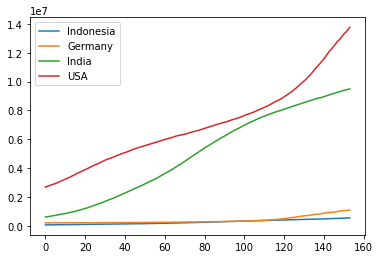

In [4]:
df = pd.DataFrame({"Indonesia":indonesia_cases,"Germany":germany_cases,"India":india_cases,"USA":usa_cases})
print(df)
df.plot()

     Indonesia   Germany     India       USA
0     0.000000  0.000000  0.000000  0.000000
1     0.003340  0.000531  0.002350  0.005010
2     0.006016  0.000987  0.004910  0.009682
3     0.008992  0.001452  0.007704  0.013787
4     0.012297  0.001814  0.010430  0.018256
..         ...       ...       ...       ...
149   0.955998  0.937661  0.983327  0.942790
150   0.967141  0.953066  0.988027  0.956802
151   0.980031  0.956623  0.992386  0.969348
152   0.989527  0.972445  0.995885  0.983471
153   1.000000  1.000000  1.000000  1.000000

[154 rows x 4 columns]


<AxesSubplot:>

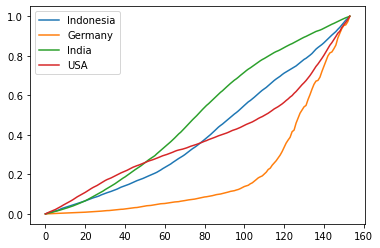

In [5]:
normalize_df = df.apply(lambda values : (values-values.min())/(values.max()-values.min()))
print(normalize_df)
normalize_df.plot()

## Analisis 

Hingga tanggal 1 Desember 2020 Amerika memiliki jumlah kasus paling banyak dari keempat negara dengan 1.4 juta kasus dikuti dengan India mendekati 1 juta kasus, sedangkan Jerman dan Indonesia memiliki jumlah kasus yang relatif lebih rendah terhadap kedua negara tersebut

Namun apabila di lihat dari data yang ternormalkan dengan total jumlah kasus terkahir, dapat kita lihat bahwa dari segi pertumbuhan kasus tidak ada perbedaan yang signifikan dari ke 4 negara terkecuali Jerman yang nampaknya memiliki laju yang tajam di hari ke 120 , dan 3 negara memiliki laju logistik yang tidak berbeda jauh.